In [1]:
import cv2

In [2]:
extraction_path=r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames"

In [3]:
# Path to the video file
video_path = 'data.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) of the video
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Release the video capture object
cap.release()

print(f"The frames per second (fps) of the video is: {fps}")


The frames per second (fps) of the video is: 24


In [4]:
frames_count = 0

video_path = 'data.mp4'

cap = cv2.VideoCapture(video_path)

while True:
    
    ret, img = cap.read()
    
    if not ret:
        print("All frames extracted")
        break
        
    frames_count += 1
    filename = extraction_path + "\\frame%d.jpg" % frames_count
    cv2.imwrite(filename, img)

print("Total frames:", frames_count)

# Release the video capture object
cap.release()

All frames extracted
Total frames: 240


# (i) Object Detection and Bounding Boxes

# (ii) Counting People

# (iii) Screen Time Calculation


In [5]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [6]:
extraction_path=r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames"

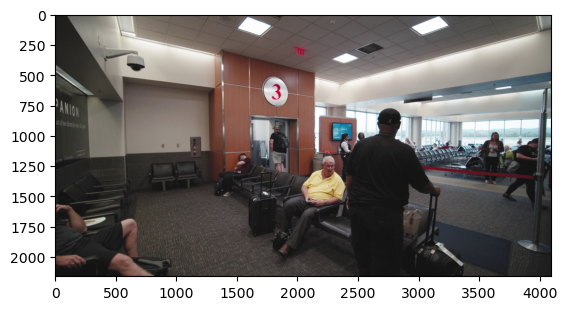

In [7]:
import matplotlib.pyplot as plt
img = plt.imread(r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames\frame185.jpg")   # reading image using its name
plt.imshow(img)

# Human detection

In [8]:
import numpy as np
for i in range(1,241):
    
    frame_path = extraction_path + "\\frame%d.jpg" % i
    image=cv2.imread(frame_path)
    height,width=image.shape[:2]

    
    # Preprocess the frames for yolov
    blob=cv2.dnn.blobFromImage(image,0.00392,(416,416),swapRB=True,crop=False)
    # scaling a pixel - 0.00392=1/255 (by default range is 0,255) , used to adjust brightness and contrast of an image
    
    net.setInput(blob)
    
    # get output
    outs=net.forward(net.getUnconnectedOutLayersNames())
    
#The Blob array contains the image data in a format that can be used by the YOLOv3 model.
#The array has 3 dimensions: the first dimension represents the batch size, the second dimension represents the height of the image, and the third dimension represents the width of the image.
#The Outs array contains the output of the YOLOv3 model, which is a list of detections. Each detection is a dictionary with the following keys:

# x: The x-coordinate of the top left corner of the bounding box.
# y: The y-coordinate of the top left corner of the bounding box.
# w: The width of the bounding box.
# h: The height of the bounding box.
# confidence: The confidence score for the detection.
# classes: The class label for the detection.
    
    # threshold
    conf_threshold=0.5
    nms_threshold=0.4   # non-maximum supression 
    
    # define lists for detection
    class_ids=[]
    confidences=[]
    boxes=[]
    
    # detection process
    
    for out in outs:
        for detection in out:
            scores=detection[5:]
            
            # only takes confidence from the dection library
            
            class_id=np.argmax(scores) # max index confidence value gets stored in class_id
            confidence=scores[class_id]
            
            if confidence>conf_threshold and class_id==0: # class_id = 0 means people 
                center_x=int(detection[0]*width)
                center_y=int(detection[1]*height)
                w=int(detection[2]*width)
                h=int(detection[3]*height)
                x=int(center_x-w/2)
                y=int(center_y-h/2)
                
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x,y,w,h])
    
        #boxes = np.array(boxes)
    
    #confidences = np.array(confidences)

    # Apply Non-Maximum Suppression (NMS)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    count=len(indices)


# print("Blob ",blob)
# print("Outs ",outs)
print("Scores ",scores)
print("Class_ids ",class_ids)
print("Boxes ",boxes)
print("Confidences ",confidences)
print("Indeces ",indices)
print("Length of indeces ",count)

Scores  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Class_ids  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Boxes  [[2248, 770, 905, 1363], [-56, 1087, 946, 1067], [-10, 1448, 878, 681], [1, 1619, 873, 509], [3463, 1003, 240, 412], [1291, 1158, 340, 315], [1301, 1191, 368, 329], [1721, 1197, 598, 728], [1763, 1181, 599, 765], [1706, 1209, 631, 772], [1762, 1220, 613, 757], [-3, 1319, 585, 792], [24, 1395, 643, 648], [29, 1461, 666, 654], [2476, 997, 62, 58], [2340, 1001, 108, 179]]
Confidences  [0.9146414399147034, 0.5222708582878113, 0.8415037393569946, 0.5670069456100464, 0.958307683467865, 0.8029783368110657, 0.7686800360679626, 0.9981396794319153, 0.9940539598464966, 0.9738510251045227, 0.9281169176101685, 0.5683620572090149, 0.6872200965881348, 0.7262176871299744, 0.5034552812576

# Counting people

In [14]:
detected_persons = {}  # Initialize an empty dictionary to track detected persons and their IDs
current_person_id = 1  # Initialize a counter for assigning person IDs

for i in range(1, 241):
    # Load the extracted frame
    frame_path = extraction_path + "\\frame%d.jpg" % i
    image = cv2.imread(frame_path)

    for index in indices:
        x, y, w, h = boxes[index]
        color = (0, 255, 0)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 3)
        
        if index not in detected_persons:
            detected_persons[index] = current_person_id
            current_person_id += 1

    resized_image = cv2.resize(image, (800, 600))
    cv2.imshow("Bounding box", resized_image)

    key = cv2.waitKey(10)

    if key == ord('q'):
        break

total_detected_persons = len(detected_persons)  # Get the count of unique detected persons
cv2.destroyAllWindows()

print("Total unique persons detected:", total_detected_persons)
print("Person IDs:", detected_persons)

# 7: This key represents the person detected at index 7 in the indices list.
# 4: This key represents the person detected at index 4 in the indices list.
# 0: This key represents the person detected at index 0 in the indices list.
# 2: This key represents the person detected at index 2 in the indices list....

Total unique persons detected: 7
Person IDs: {7: 1, 4: 2, 0: 3, 2: 4, 5: 5, 15: 6, 14: 7}


# Screen time for each person in the video